<a href="https://colab.research.google.com/github/ddoneu/ECON3916-Statistical-Machine-Learning/blob/main/InClass%20notes/DatDo_In_class_note_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

### **Case Study**: Do experienced poker players change strategy after a big win/loss?


In [28]:
np.random.seed(42)

null_mean = 35
sample_mean = 25.53
n_pro = 203
std_dev = 8.5
pop_size = 100000

In [29]:
population_data = np.random.normal(null_mean, std_dev, pop_size)
pro_sample = np.random.normal(sample_mean, std_dev, n_pro)

In [33]:
t_statistic, p_value = stats.ttest_1samp(pro_sample, null_mean)

print("="*100)
print(f"T-statistic: {t_statistic:.10f}")
print(f"P-value: {p_value:.10f}")
print("="*100)


print("Hypothesis Test Result")
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis")

T-statistic: -16.4667160328
P-value: 0.0000000000
Hypothesis Test Result
Reject the null hypothesis. There is a significant difference.


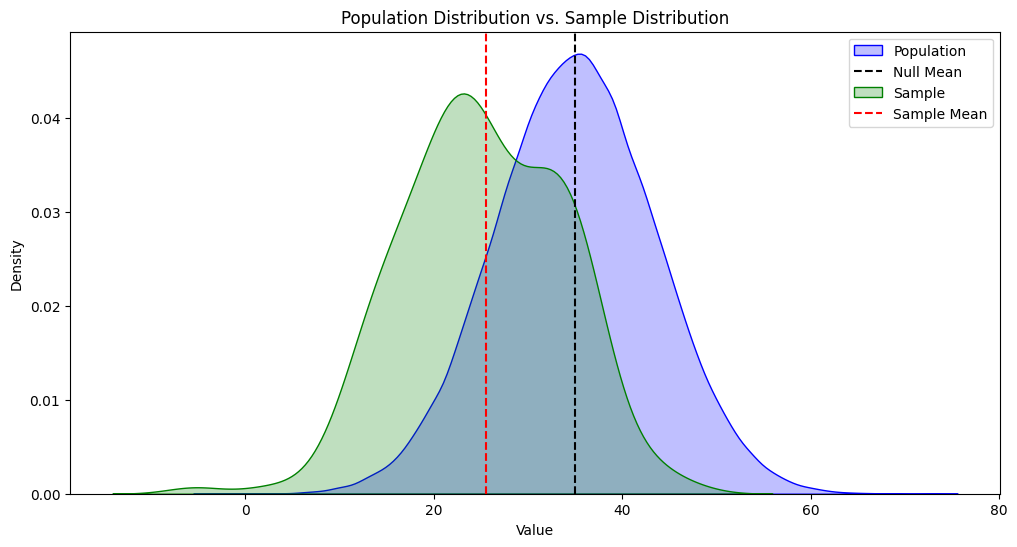

In [39]:
plt.figure(figsize=(12, 6))
sns.kdeplot(population_data, label='Population', color='blue', fill=True)
plt.axvline(null_mean, color='black', linestyle='--', label='Null Mean')

sns.kdeplot(pro_sample, label='Sample', color='green', fill=True)
plt.axvline(sample_mean, color='red', linestyle='--', label='Sample Mean')

plt.title('Population Distribution vs. Sample Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

In [40]:
ci_low, ci_high = stats.t.interval(0.95, len(pro_sample)-1, loc=np.mean(pro_sample), scale=stats.sem(pro_sample))

Text(25.20704901546799, 0.01, '(24.03, 26.38)')

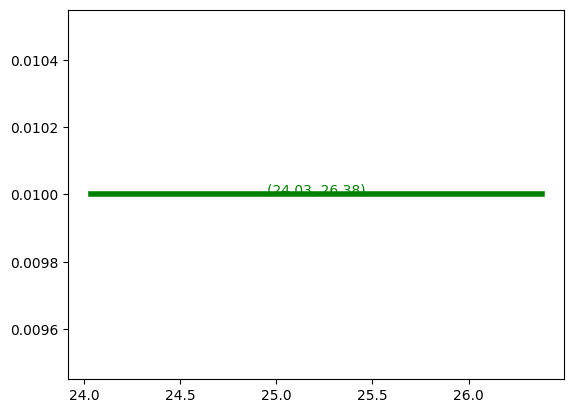

In [48]:
plt.plot([ci_low, ci_high], (0.01,0.01), color = 'green', linewidth = 4, label="95% C.I.")
plt.text((ci_low + ci_high)/2, 0.01, s=f"({ci_low:.2f}, {ci_high:.2f})", color = 'green', ha ='center')

In [41]:
ci_high

np.float64(26.37968837124167)

In [42]:
ci_low

np.float64(24.03440965969431)

### 1. Hair Salon Prices (Matched-Pair Data)

This study compares the price of haircuts for men and women at the same salons.

In [56]:
df_salon = pd.read_csv('hair_salon_transactions.csv')
df_salon

,Salon,Gender,Price
0,Newbury Street Salon,Female,48.04
1,Fenway Barbers,Female,32.14
2,South End Studio,Male,43.93
3,Beacon Hill Salon,Female,48.55
4,Roxbury Cuts,Female,69.27
...,...,...,...
4195,Northeastern Salon,Male,59.97
4196,Back Bay Hair,Female,56.53
4197,Chinatown Barber,Male,37.42
4198,Great Clips,Female,27.78


In [60]:
salon_summary = df_salon.groupby(['Salon','Gender'])['Price'].mean().unstack()
salon_summary["Difference"] = salon_summary["Female"] - salon_summary["Male"]
print(salon_summary)

Gender                   Female       Male  Difference
Salon                                                 
Back Bay Hair         57.381031  42.304103   15.076928
Beacon Hill Salon     49.095982  48.834872    0.261110
Boston Barber         44.092692  33.879310   10.213382
Cambridge Cuts        52.908598  43.103030    9.805568
Campus Cuts           34.951789  30.097629    4.854161
Chinatown Barber      47.760673  43.175638    4.585035
Downtown Cuts         23.962182  21.113363    2.848819
Fenway Barbers        32.832396  29.846639    2.985757
Floyd's 99            39.889223  37.758365    2.130858
Great Clips           27.267281  26.876753    0.390527
Harvard Sq Hair       31.916077  21.977982    9.938095
Newbury Street Salon  48.151327  48.186154   -0.034827
Northeastern Salon    59.151200  58.795120    0.356080
Roxbury Cuts          67.063945  56.850000   10.213945
Seaport Studio        47.733855  43.269406    4.464449
Sola Salon            43.880636  39.937030    3.943607
South End 

In [62]:
t_statistic, p_value = stats.ttest_1samp(salon_summary['Difference'], popmean=0)

print("="*100)
print(f"T-statistic: {t_statistic:.10f}")
print(f"P-value: {p_value:.10f}")
print("="*100)


print("Hypothesis Test Result")
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis")

T-statistic: 5.2102895389
P-value: 0.0000498115
Hypothesis Test Result
Reject the null hypothesis. There is a significant difference.


### 2. Immigrant Mothers & Daughters (Economic Status)

This study compares the economic percentile of immigrant mothers vs. their adult daughters. We have the 4,121 raw records.

In [63]:
df = pd.read_csv('immigrant_mobility_study.csv')
df

,Pair_ID,Mother_Year,Mother_Zip,Mother_Pct,Daughter_Year,Daughter_Zip,Daughter_Pct
0,1,1970,95266,50.9,2000,94258,50.7
1,2,1970,91548,39.5,2000,92740,67.6
2,3,1970,94019,53.7,2000,90979,62.4
3,4,1970,94205,69.4,2000,90518,80.7
4,5,1970,91369,37.8,2000,94994,12.8
...,...,...,...,...,...,...,...
4116,4117,1970,91113,37.6,2000,92790,15.4
4117,4118,1970,91292,8.0,2000,94262,53.1
4118,4119,1970,91162,33.8,2000,92253,12.2
4119,4120,1970,91030,23.3,2000,94974,32.1


In [64]:
df['Mobility_Gain'] = df['Mother_Pct'] - df['Daughter_Pct']
df

,Pair_ID,Mother_Year,Mother_Zip,Mother_Pct,Daughter_Year,Daughter_Zip,Daughter_Pct,Mobility_Gain
0,1,1970,95266,50.9,2000,94258,50.7,0.2
1,2,1970,91548,39.5,2000,92740,67.6,-28.1
2,3,1970,94019,53.7,2000,90979,62.4,-8.7
3,4,1970,94205,69.4,2000,90518,80.7,-11.3
4,5,1970,91369,37.8,2000,94994,12.8,25.0
...,...,...,...,...,...,...,...,...
4116,4117,1970,91113,37.6,2000,92790,15.4,22.2
4117,4118,1970,91292,8.0,2000,94262,53.1,-45.1
4118,4119,1970,91162,33.8,2000,92253,12.2,21.6
4119,4120,1970,91030,23.3,2000,94974,32.1,-8.8


In [65]:
t_statistic, p_value = stats.ttest_1samp(salon_summary['Difference'], popmean=0)

print("="*100)
print(f"T-statistic: {t_statistic:.10f}")
print(f"P-value: {p_value:.10f}")
print("="*100)


print("Hypothesis Test Result")
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis")

T-statistic: 5.2102895389
P-value: 0.0000498115
Hypothesis Test Result
Reject the null hypothesis. There is a significant difference.


# **Do Admired Companies Win?**
### 3. Fortune Top 10 vs. S&P 500 (Stock Returns)
Each year, Fortune magazine lists America's most admired companies, highlighting the top 10. The question is whether the stocks of these top companies outperform the average stock.

In [23]:
import yfinance as yf

In [24]:
# 1. SETUP
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'BRK-B', 'JNJ', 'JPM', 'PG', 'KO', 'DIS']
market_ticker = '^GSPC' # S&P 500

# 2. DOWNLOAD DATA
# Added 'auto_adjust=False' to ensure 'Adj Close' column exists
start_date = '2004-01-01'
end_date = '2024-01-01'

stocks_data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)
market_data = yf.download(market_ticker, start=start_date, end=end_date, auto_adjust=False)

# Select 'Adj Close' explicitly
stocks_df = stocks_data['Adj Close']
market_df = market_data['Adj Close']

[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  1 of 1 completed


# **The Theory: Do people with positive initials (A.C.E., V.I.P.) live longer than those with negative initials (P.I.G., D.I.E.)?**

# **The Millionarie Maker - Powerball Edition**